# Advertising Channel Sales Prediction

# Problem Statment

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

# Importing requried Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading dataset
df=pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.shape

(200, 5)

    Our dataset have 200 rows and 5 columns including Target column. Sales is our target attribute.
    This is a regression problem statement

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


<AxesSubplot:>

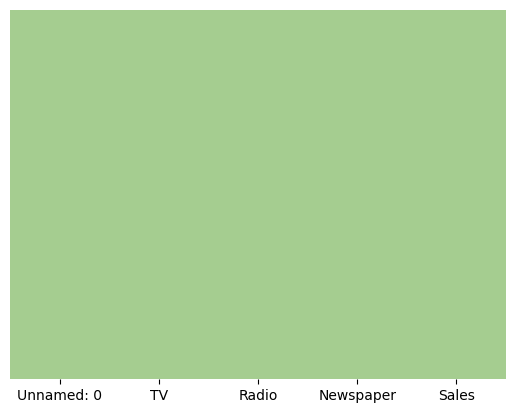

In [13]:
## Plotting Null values on heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='crest')

   No null values present in our dataset

In [21]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# Statistical Summary

In [14]:
## statistical Summary
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Our dataset seems to be normally distributed because mean and median values are nearly close to each other.

There could be some outliers present in newspaper column because there is a compartively high difference between 3rd quantile and max values.

Radio attribute has a minimum zero value in our dataset which could be part of further investigation in our dataset.

<AxesSubplot:title={'center':'Correlation Heatmap'}>

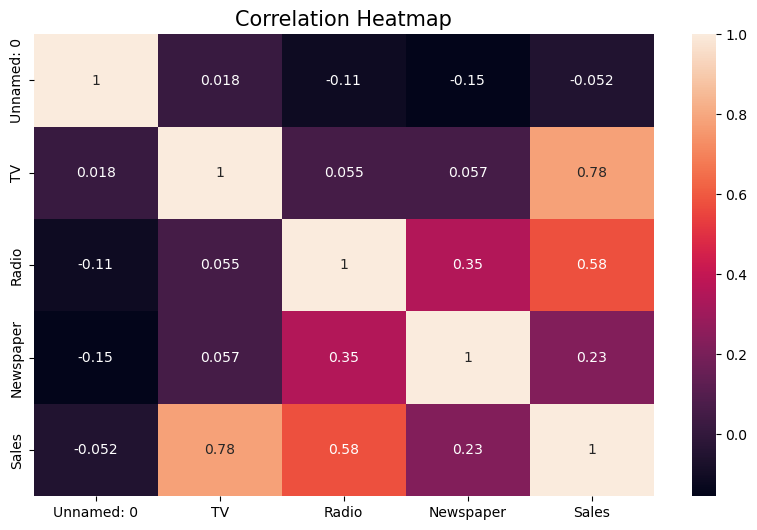

In [17]:
## Correlation Plot
plt.figure(figsize=(10,6))
plt.title('Correlation Heatmap',fontsize=15)
sns.heatmap(df.corr(),annot=True)

    We can clearly see that Sales & TV are highly positive correleted.
    Unnamed:0 have least and negative correlation with our target attribute.
    Newspaper and radio are correlated to each other.

# Data Analysis and Visualization

<AxesSubplot:title={'center':'TV Advertising Vs Sales '}, xlabel='TV', ylabel='Sales'>

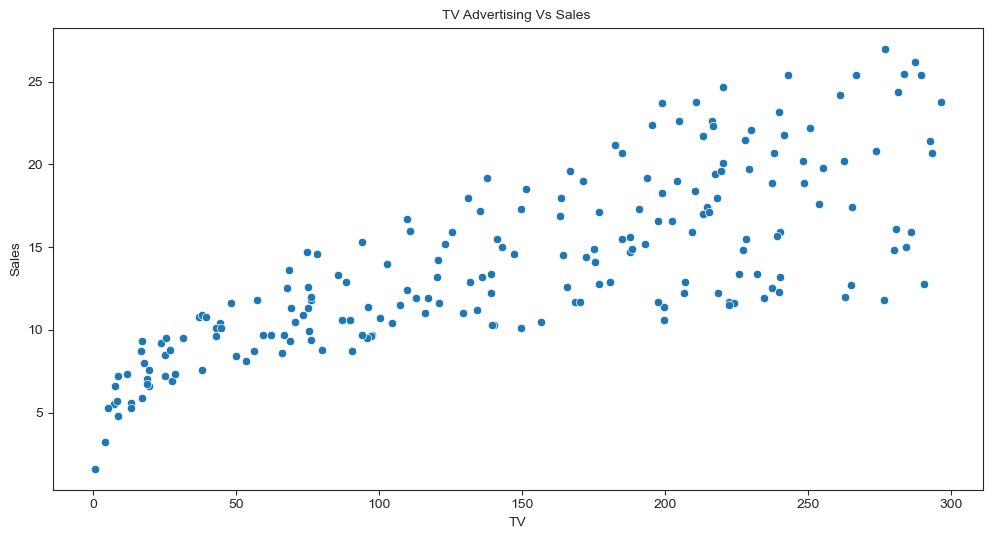

In [23]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
plt.title('TV Advertising Vs Sales ',fontsize=10)
sns.scatterplot(df['TV'],df['Sales'],data=df)

There is a linear positive correlation between TV advertising and Sales.

As Tv advertising inceases sales also increases.

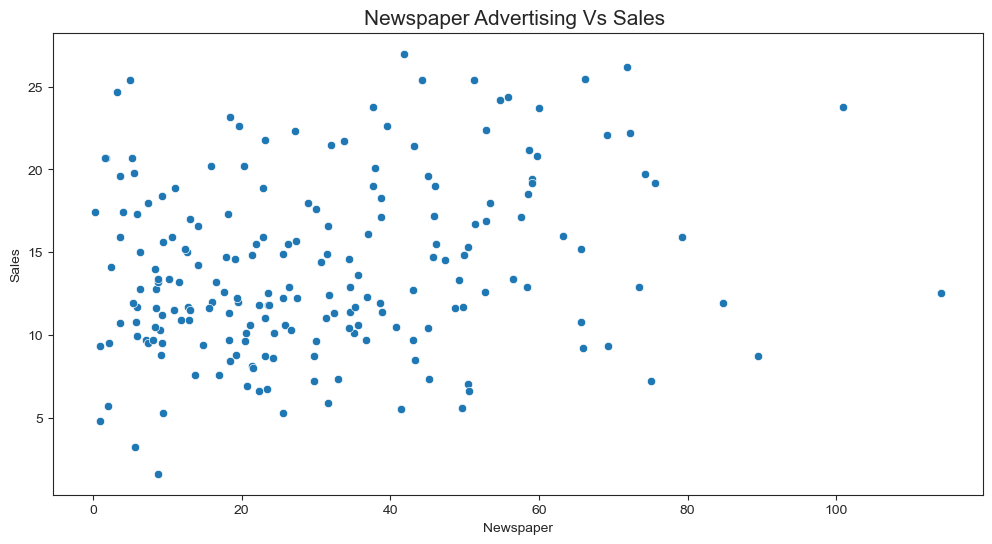

In [25]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
plt.title('Newspaper Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df['Newspaper'],df['Sales'],data=df)
plt.show()

from above scatter plot we can see that there is a moderate realtionship with sales.

Datapoints are scattered we can't conclude from this plot

Some points are widly scattered.

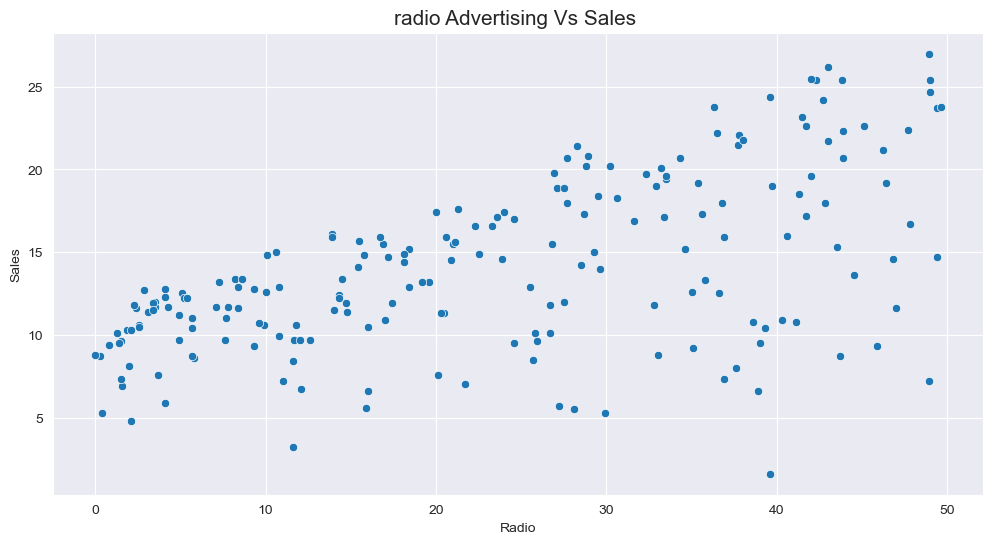

In [27]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('radio Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df['Radio'],df['Sales'],data=df)
plt.show()

This plot shows a positive linear relation between radio advertising and sales.

As radio advertising increases, sales also get increases.

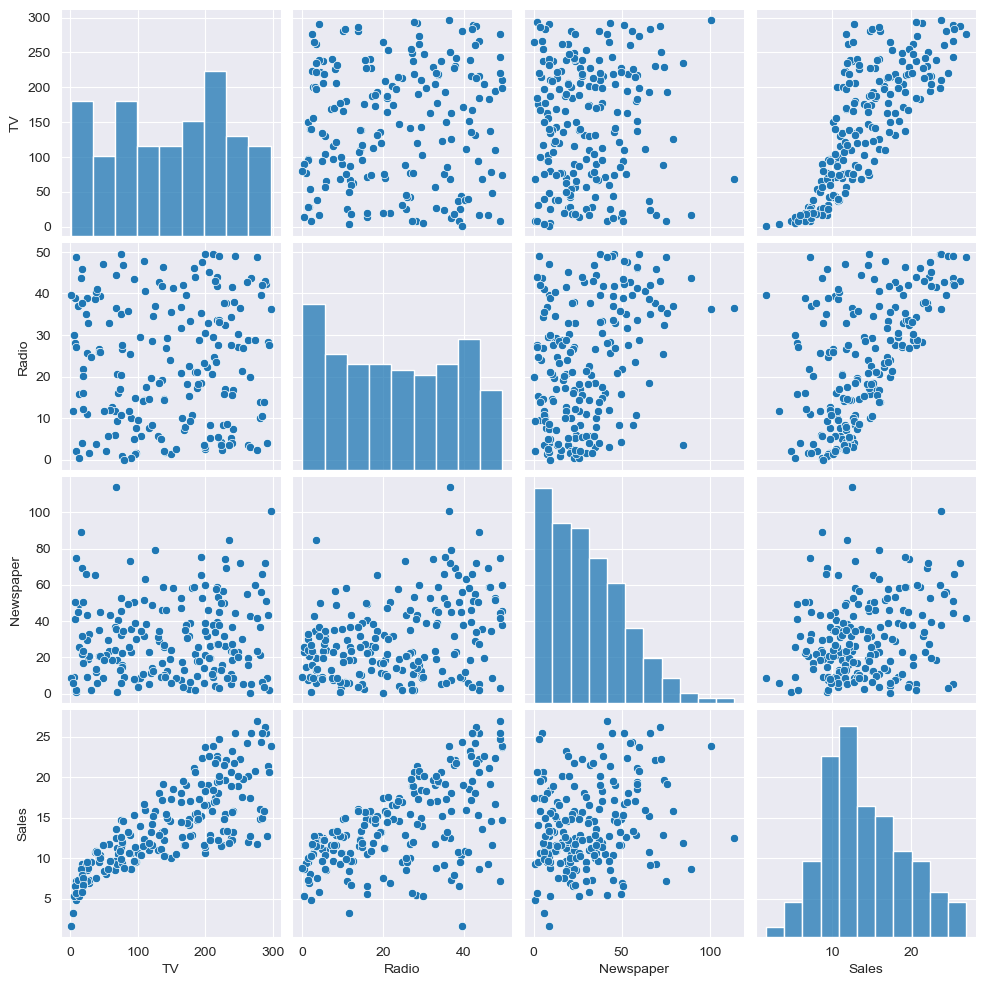

In [28]:
## Let's plot the pairplot for all the attributes together
sns.pairplot(df)

# Data Distrubution

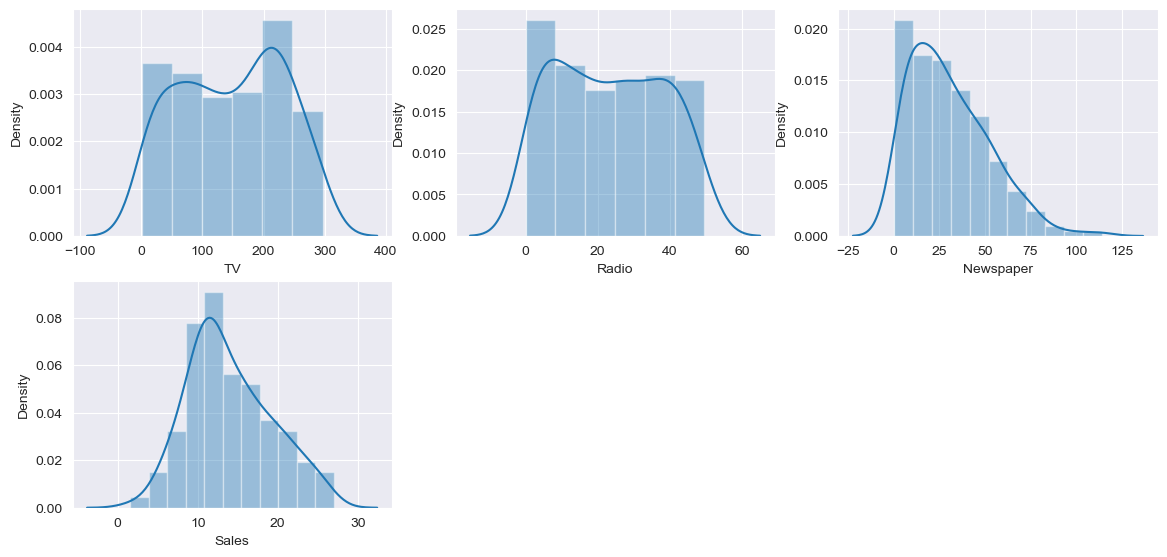

In [29]:
plt.figure(figsize=(14,10))
plot=1
for col in df:
    if plot<=5:
        plt.subplot(3,3,plot)
        sns.distplot(df[col])
        plt.xlabel(col)
        plot=plot+1

It shows that our dataset is approimately bell shaped in distribution means normally distributed.

Newspaper attribute is a little right skewed.

our target attribute is Normally distributed.

# Checking Outliers

<AxesSubplot:>

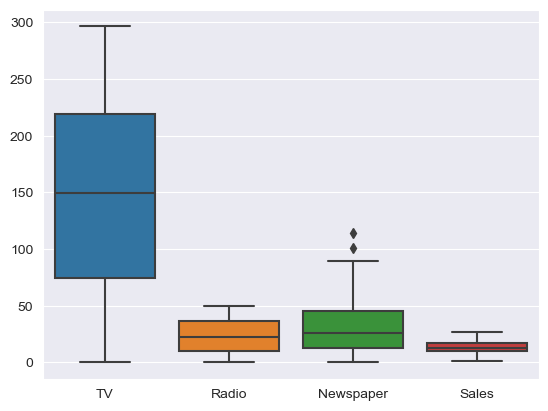

In [32]:
sns.boxplot(data=df)

Here we can see that there are some outliers in newspaper column

# Treating Outlier

In [33]:
def outlier_normally(df,col):
    lower_boundary=df[col].mean()-3*df[col].std()
    upper_boundary=df[col].mean()+3*df[col].std()
    print(lower_boundary,upper_boundary)
    df[col]=np.where((df[col]<lower_boundary)|(df[col]>upper_boundary),df[col].median(),df[col])
    sns.boxplot(df[col])

-34.7818625155685 95.8898625155685


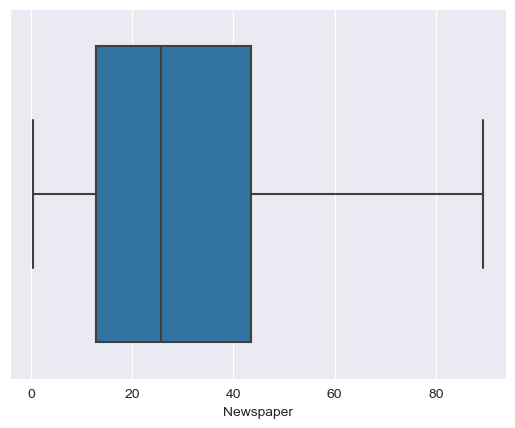

In [34]:
outlier_normally(df,'Newspaper')

We have replaced the outliers with median , now there is no outliers present in our dataset.

Now we can see that our dataset has no outliers present.

# Skewness

In [35]:
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.658874
Sales        0.407571
dtype: float64

We can see that for Newspaper attribute skewness is more than 0.5 so we will remove this with some transformation methods.

In [37]:
df['Newspaper']=np.sqrt(df['Newspaper'])

In [39]:
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper   -0.040656
Sales        0.407571
dtype: float64

Now we can see that skewness is completly removed from our dataset.

# Splitting data into Input and Output Variable

In [40]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [41]:
x

,TV,Radio,Newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989
...,...,...,...
195,38.2,3.7,3.714835
196,94.2,4.9,2.846050
197,177.0,9.3,2.529822
198,283.6,42.0,8.136338


In [42]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

# Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [48]:
mm=MinMaxScaler()
x_scaled=mm.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,TV,Radio,Newspaper
0,0.775786,0.762097,0.872410
1,0.148123,0.792339,0.692447
2,0.055800,0.925403,0.873084
3,0.509976,0.832661,0.797178
4,0.609063,0.217742,0.796443
...,...,...,...
195,0.126818,0.074597,0.355558
196,0.316199,0.098790,0.258023
197,0.596212,0.187500,0.222522
198,0.956713,0.846774,0.851942


# Feature Importance

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
extra=ExtraTreesRegressor()
extra.fit(x,y)

ExtraTreesRegressor()

<AxesSubplot:title={'center':'Important Features'}>

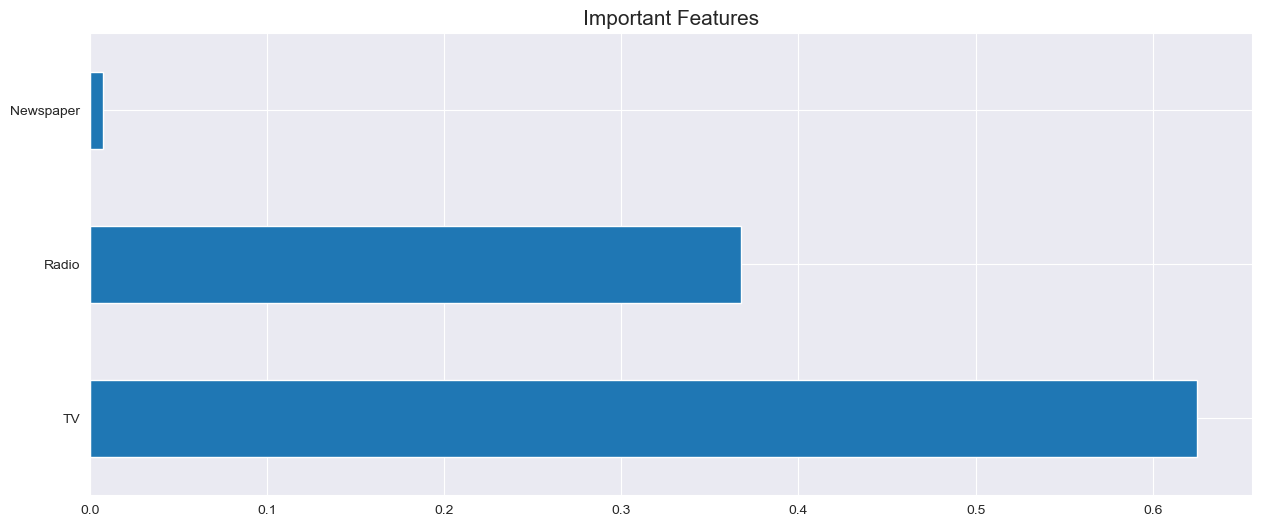

In [50]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest().plot(kind='barh')

we can see that radio and TV are highly important features for our target column to predict the right sales price.

# Model Building

# Importing Packages For Classification Algoritham

In [63]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [64]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1)
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean())
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std())
    print('Training accuracy',clf.score(x_train,y_train))
    print('Test Accuracy',clf.score(x_test,y_test))
    print('MAE',mean_absolute_error(y_test,pred))
    print('MSE',mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    
    return final_r

In [65]:
lr=LinearRegression()
maxr2_score(lr,x,y)

max r2 score corresponding to 92 is 0.9515375445674435
cross validation score 0.8874289458669635
Standard Deviation 0.039909298543301004
Training accuracy 0.890810705879388
Test Accuracy 0.9188727395820788
MAE 1.1592043558674565
MSE 2.079624306279033
RMSE 1.442090255940672


92

In [66]:
lasso=Lasso()
maxr2_score(lasso,x,y)

max r2 score corresponding to 61 is 0.2584611573474679
cross validation score 0.1521277546459734
Standard Deviation 0.03619806955363437
Training accuracy 0.16933976176928867
Test Accuracy 0.12699080501760696
MAE 4.00541437153813
MSE 22.37880500509816
RMSE 4.7306241665448505


61

In [67]:
ridge=Ridge()
maxr2_score(ridge,x,y)

max r2 score corresponding to 92 is 0.9446753367014221
cross validation score 0.8845305190608166
Standard Deviation 0.04479909954370852
Training accuracy 0.8870326282123853
Test Accuracy 0.9130732892117075
MAE 1.2010756256962765
MSE 2.2282879970181675
RMSE 1.492745121250834


92

In [68]:
dt=DecisionTreeRegressor()
maxr2_score(dt,x,y)

max r2 score corresponding to 75 is 0.975987927337496
cross validation score 0.9493267414110461
Standard Deviation 0.004956826236869144
Training accuracy 1.0
Test Accuracy 0.9389192520899895
MAE 0.8174999999999999
MSE 1.56575
RMSE 1.2512993247021273


75

In [69]:
knn=KNeighborsRegressor()
maxr2_score(knn,x,y)

max r2 score corresponding to 43 is 0.9680108108201998
cross validation score 0.9417903107303349
Standard Deviation 0.018809358597280845
Training accuracy 0.9564365349883843
Test Accuracy 0.9314963271579654
MAE 0.8755000000000001
MSE 1.7560299999999998
RMSE 1.3251528213757082


43

In [70]:
svm=SVR()
maxr2_score(svm,x,y)

max r2 score corresponding to 45 is 0.9800124116681077
cross validation score 0.9142519054349407
Standard Deviation 0.05008727217746945
Training accuracy 0.9332249922815076
Test Accuracy 0.9221684152521298
MAE 0.8179703227818427
MSE 1.99514262658538
RMSE 1.4124951775441146


45

In [71]:
rf=RandomForestRegressor()
maxr2_score(rf,x,y)

max r2 score corresponding to 47 is 0.9893513184979081
cross validation score 0.9756002943706452
Standard Deviation 0.008659222926034299
Training accuracy 0.9967521745005458
Test Accuracy 0.9841649775104255
MAE 0.48525000000000135
MSE 0.4059165500000018
RMSE 0.6371158057998576


47

In [72]:
adb=AdaBoostRegressor()
maxr2_score(adb,x,y)

max r2 score corresponding to 70 is 0.9739449906303437
cross validation score 0.9539461360911204
Standard Deviation 0.0111005441932764
Training accuracy 0.9756663491344277
Test Accuracy 0.956563881986161
MAE 0.9013127890080831
MSE 1.1134457927785495
RMSE 1.0551994090116568


70

In [73]:
gb=GradientBoostingRegressor()
maxr2_score(gb,x,y)

max r2 score corresponding to 69 is 0.9905711071722212
cross validation score 0.9773983142326668
Standard Deviation 0.009238649432640736
Training accuracy 0.9985290210924179
Test Accuracy 0.9825324796314827
MAE 0.48546464273159506
MSE 0.44776416387860757
RMSE 0.66915182423618


69

In [74]:
Best_model=best_model=pd.DataFrame({'Model':['LinearRegression','Lasso','Ridge','DecisionTreeRegressor','KNeighborsRegressor','SVM','RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor'],
                         'R_2 score':[95.15,86.16,95.12,97.97,96.39,97.63,98.90,97.73,99.05],
                         'Cross_validation':[88.74,81.75,88.74,94.72,93.30,90.43,97.59,92.22,97.75]})
best_model

,Model,R_2 score,Cross_validation
0,LinearRegression,95.15,88.74
1,Lasso,86.16,81.75
2,Ridge,95.12,88.74
3,DecisionTreeRegressor,97.97,94.72
4,KNeighborsRegressor,96.39,93.30
5,SVM,97.63,90.43
6,RandomForestRegressor,98.90,97.59
7,AdaBoostRegressor,97.73,92.22
8,GradientBoostingRegressor,99.05,97.75


From above table it is clear that Random Forest Regressor if our best model because the difference between R_2 score and Cross validation score is minimum which shows that our Model is not overfit and best among all.

# Hyperparameter Tuning for Random Forest

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=.20)
forest=RandomForestRegressor()
param={'n_estimators':[50,100,200],'max_depth':[10,50,None],'max_features': [1,2,3],'bootstrap': [True, False]}
glf=GridSearchCV(estimator=forest,param_grid=param,scoring='r2',n_jobs=-1)
glf.fit(x_train,y_train)
glf.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'n_estimators': 100}

Error
 Mean Absolute Error (MAE) : 0.4782266666666663
Mean Squared Error (MSE) : 0.3812391139999986
Root Mean Squared Error : 0.6174456364733648
R_2 score: 0.9861927119500605


<AxesSubplot:ylabel='Sales'>

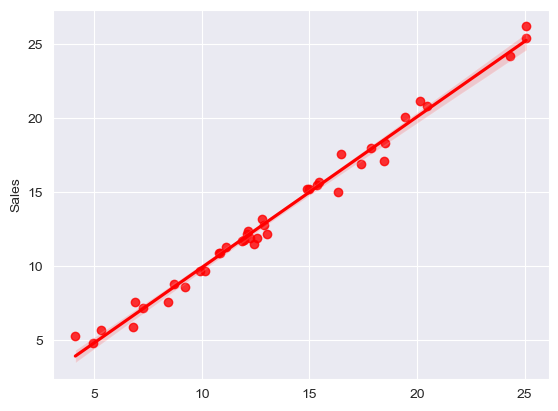

In [76]:
forest=RandomForestRegressor(bootstrap=True,max_depth=10,max_features=3,n_estimators=50)
forest.fit(x_train,y_train)
pred=forest.predict(x_test)
print('Error')
print(' Mean Absolute Error (MAE) :',mean_absolute_error(pred,y_test))
print('Mean Squared Error (MSE) :',mean_squared_error(pred,y_test))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(pred,y_test)))
print('R_2 score:',r2_score(pred,y_test))
## best fit line
sns.regplot(pred,y_test,color='r')

# conclusion:

From dataframe table it is clear that Random Forest Regressor is our best model because the difference between R_2 score and Cross validation score is minimum which shows that our Model is not overfit and best among all.We also did Hyperparameter tunning and after that we can see that with Hyperparameter tuning our R_2 score is 98.57 which is improved hence we will save this as our best Model.